# Churned Modeling: Unraveling Customer Churn

**BY : JOHN VICTOR**

**Dataset Overview**

The dataset comprises the following key features:

1. **RowNumber**: An index of the row in the dataset.
2. **CustomerId**: A unique identifier for each customer.
3. **Surname**: The last name of the customer.
4. **CreditScore**: The credit score assigned to the customer.
5. **Geography**: The geographic area where the customer resides.
6. **Gender**: The gender of the customer.
7. **Age**: The age of the customer.
8. **Tenure**: The number of years the customer has been with the bank.
9. **Balance**: The account balance of the customer.
10. **NumOfProducts**: The number of products the customer uses.
11. **HasCrCard**: Indicates whether the customer has a credit card (1 = yes, 0 = no).
12. **IsActiveMember**: Indicates whether the customer is an active member (1 = yes, 0 = no).
13. **EstimatedSalary**: The estimated salary of the customer.
14. **Exited**: Indicates whether the customer has churned (1 = yes, 0 = no).1 = yes, 0 = no).


## Data Loading

### Import necessary libraries for analysis

In [2]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading datasets

In [3]:
df = pd.read_csv('/Users/user 2/Documents/Practices/Portfolio/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking for null values

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Display of columns with their respective datatypes

In [5]:
list(zip(df.dtypes,df.columns))

[(dtype('int64'), 'RowNumber'),
 (dtype('int64'), 'CustomerId'),
 (dtype('O'), 'Surname'),
 (dtype('int64'), 'CreditScore'),
 (dtype('O'), 'Geography'),
 (dtype('O'), 'Gender'),
 (dtype('int64'), 'Age'),
 (dtype('int64'), 'Tenure'),
 (dtype('float64'), 'Balance'),
 (dtype('int64'), 'NumOfProducts'),
 (dtype('int64'), 'HasCrCard'),
 (dtype('int64'), 'IsActiveMember'),
 (dtype('float64'), 'EstimatedSalary'),
 (dtype('int64'), 'Exited')]

### Converting the Object datatypes into String datatypes

In [6]:
d = df.select_dtypes(include='object').columns
for x in d:
    df[x]== df[x].astype('|S')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Customer Churn Analysis:

### Calculation of Customer Churn Rate 

In [8]:
# Calculate the churn rate by dividing the number of churned customers by the total number of customers
churned_customers = df['Exited'].sum()
total_customers = len(df)
churn_rate_percentage = (churned_customers / total_customers) * 100

churn_rate_percentage

20.369999999999997

1. **Churn Rate by Gender:**

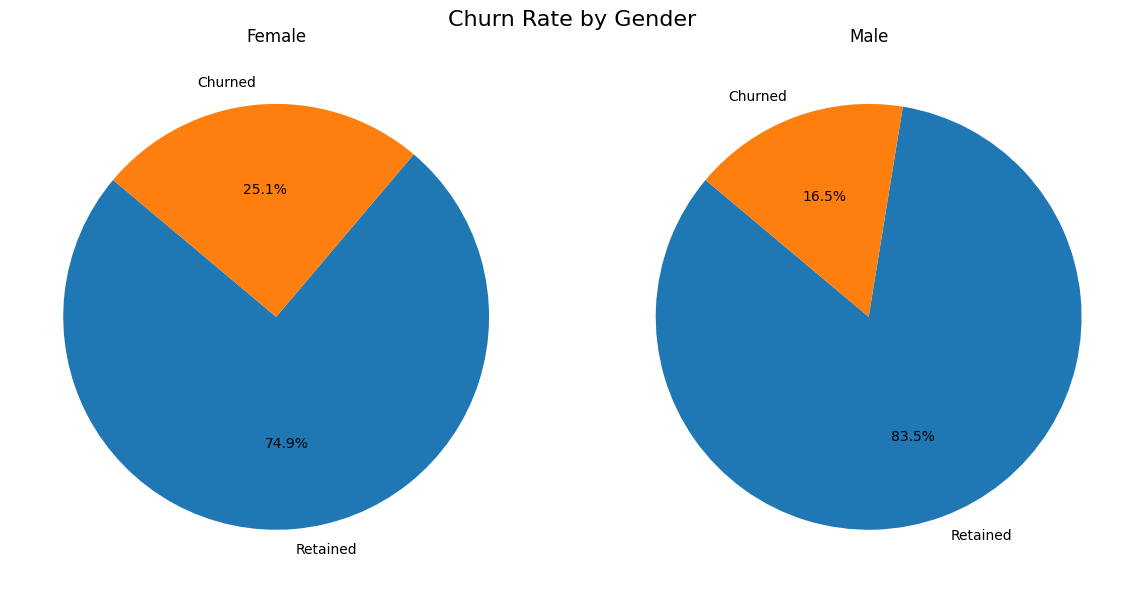

In [9]:
# Calculate the counts of churned and retained customers by gender
churn_by_gender = df.groupby('Gender')['Exited'].value_counts(normalize=True).unstack() * 100

# Plot a pie chart for each gender showing the churn rate
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Title for the whole figure
fig.suptitle('Churn Rate by Gender', fontsize=16)

# Pie chart for Female
axes[0].pie(churn_by_gender.loc['Female'], labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Female')

# Pie chart for Male
axes[1].pie(churn_by_gender.loc['Male'], labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Male')

# Show the plots
plt.tight_layout()
plt.show()

### Visualization of churn by product usage among Females

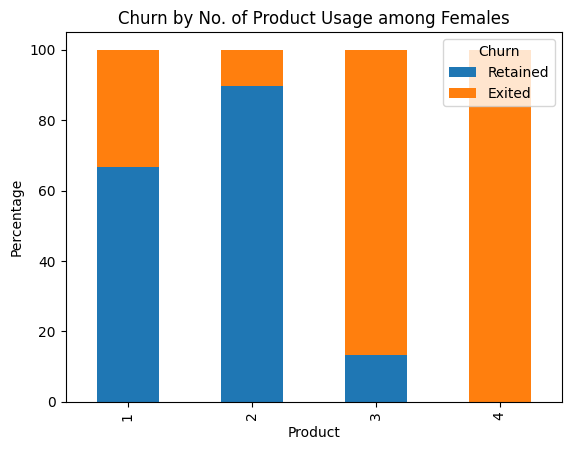

In [10]:
product_usage_female = df[df['Gender'] == 'Female'].groupby('NumOfProducts')['Exited'].value_counts(normalize=True).unstack() * 100

product_usage_female.plot(kind='bar', stacked=True)
plt.title('Churn by No. of Product Usage among Females')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.legend(title='Churn', labels=['Retained', 'Exited'])
plt.show()

### Churned Customers by Geography:

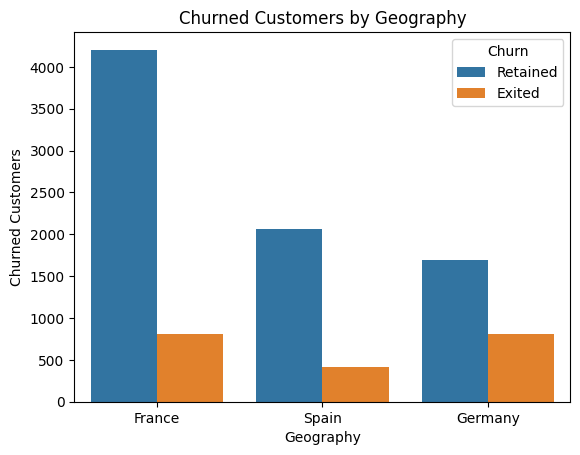

In [11]:
# Churned Customers by Geography
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churned Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Churned Customers')
plt.legend(title='Churn', labels=['Retained', 'Exited'])
plt.show()

### The Credit Scores of Churned vs. Retained Customers.

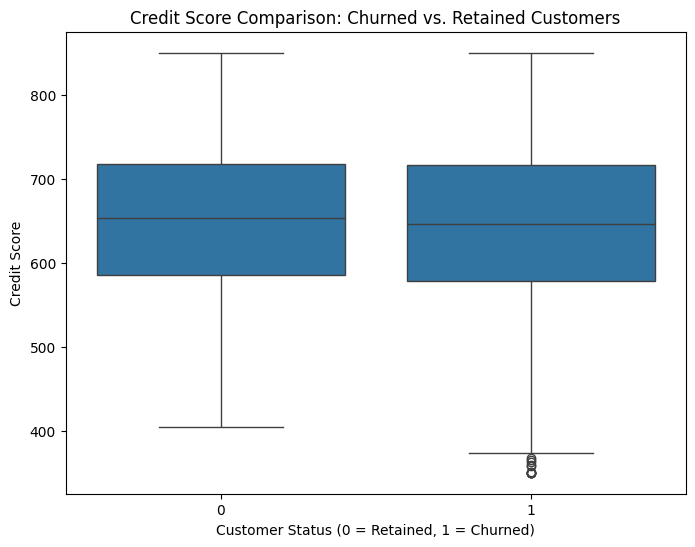

In [12]:
# Create a boxplot to compare the credit scores of churned vs. retained customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score Comparison: Churned vs. Retained Customers')
plt.xlabel('Customer Status (0 = Retained, 1 = Churned)')
plt.ylabel('Credit Score')
plt.show()

### A Histogram of Consumer Ages

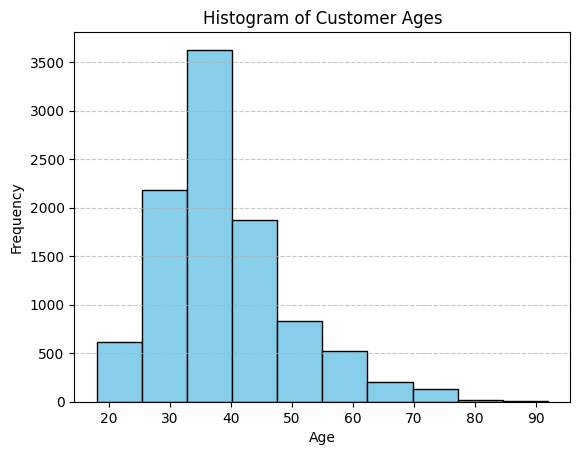

In [13]:
# A histogram of customer ages
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Customer Ages')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### A Scatter Plot to Analyze the Relationship Between Balance and Age

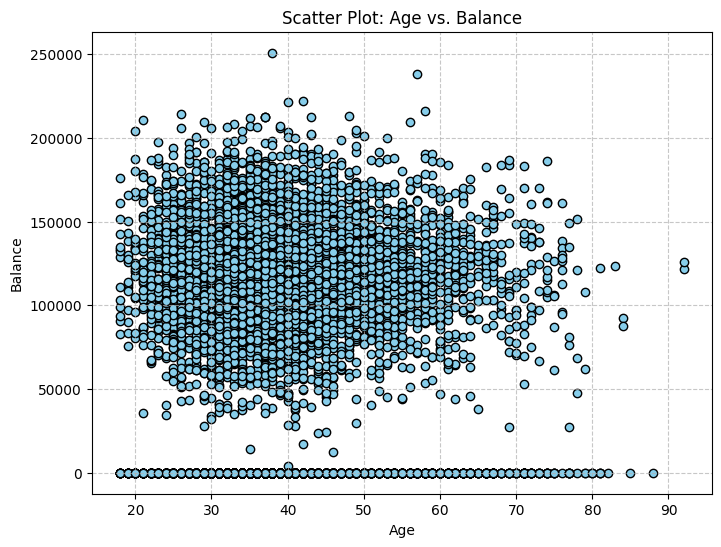

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'],df['Balance'], color='skyblue', marker='o', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot: Age vs. Balance')
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

 ### The number of products used by customers in Different Geographics

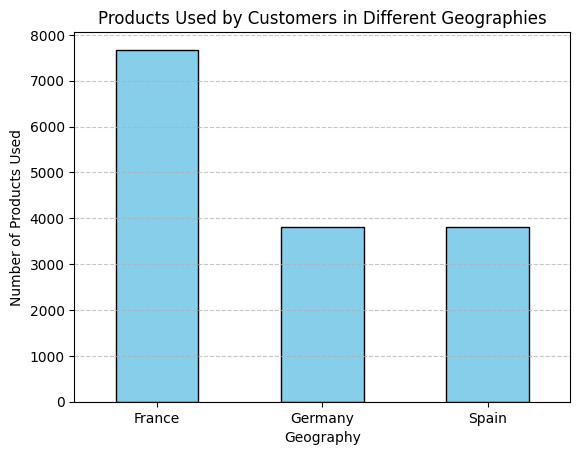

In [35]:
pivot = df['NumOfProducts'].groupby(df['Geography']).sum()
pivot.plot(color='skyblue', edgecolor='black', kind = 'bar', rot = 0)
plt.xlabel('Geography')
plt.ylabel('Number of Products Used')
plt.title('Products Used by Customers in Different Geographies')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### The bar chart compares the number of customers in France, Germany, and Spain, segmented by credit card ownership

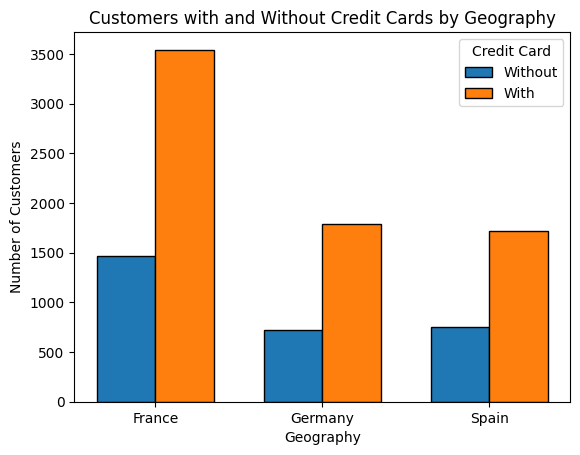

In [55]:
pivot = df.groupby('Geography')['HasCrCard'].value_counts().unstack()
fig, ax = plt.subplots()

bar_width = 0.35
bar_positions = np.arange(len(pivot.index))

ax.bar(bar_positions - bar_width/2, pivot.iloc[:, 0], bar_width, edgecolor='black', label='Without')
ax.bar(bar_positions + bar_width/2, pivot.iloc[:, 1], bar_width, edgecolor='black', label='With')

ax.set_xticks(bar_positions)
ax.set_xticklabels(pivot.index)
ax.set_xlabel('Geography')
ax.set_ylabel('Number of Customers')
ax.set_title('Customers with and Without Credit Cards by Geography')
ax.legend(title='Credit Card')

plt.show()
